<a href="https://colab.research.google.com/github/kae4ka/neural_networks_course/blob/main/INS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Обучение однослойного персептрона решению линейно разделимых задач. Функции «And» и «Or». Метод простого перебора



* Два входа, один выход
* Обучающая выборка – таблицы истинности
* Функция активация – ступенчатая
* Значения весов перебирать в цикле (например, от -1 до +1 с шагом 0.1)
* Ошибку считать по МНК
* Запоминать все значения весов, при которых ошибка равна 0

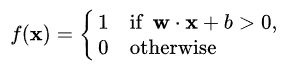

In [ ]:
import numpy as np

# unit step function
def step_func(u):
        return 1 if (u > 0) else 0

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
weights = []

def perceptron(x, y, weights):
  for i in np.arange(-1.0, 1.1, 0.1):
    for j in np.arange(-1.0, 1.1, 0.1):
      for q in np.arange(-1.0, 1.1, 0.1):
        fail = 0
        w = np.array([i, j, q])
        for k, m in np.array(list(zip(x, y))):
            k = np.insert(k, len(k), 1, axis=0)
            y_pred = np.matmul(k, w.T)
            y_pred = step_func(y_pred)
            err = m - y_pred
            # print(k, ' * ', w.T, ' = ', m, np.matmul(k,w.T))
            if err != 0:
              fail += 1
        if fail == 0:
          weights.append(w)

perceptron(x, y, weights)

print(weights)

for k, m in np.array(list(zip(x, y))):
  print(k, m)
  k = np.insert(k, len(k), 1, axis=0)
  y_pred = np.dot(k, weights[0].T)
  print(step_func(y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[array([ 0.1,  0.1, -0.1]), array([ 0.1,  0.2, -0.2]), array([ 0.1,  0.3, -0.3]), array([ 0.1,  0.4, -0.4]), array([ 0.1,  0.5, -0.5]), array([ 0.1,  0.6, -0.6]), array([ 0.1,  0.7, -0.7]), array([ 0.1,  0.8, -0.8]), array([ 0.1,  0.9, -0.9]), array([ 0.1,  1. , -1. ]), array([ 0.2,  0.1, -0.2]), array([ 0.2,  0.2, -0.3]), array([ 0.2,  0.2, -0.2]), array([ 0.2,  0.3, -0.4]), array([ 0.2,  0.3, -0.3]), array([ 0.2,  0.4, -0.5]), array([ 0.2,  0.4, -0.4]), array([ 0.2,  0.5, -0.6]), array([ 0.2,  0.5, -0.5]), array([ 0.2,  0.6, -0.7]), array([ 0.2,  0.6, -0.6]), array([ 0.2,  0.7, -0.8]), array([ 0.2,  0.7, -0.7]), array([ 0.2,  0.8, -0.9]), array([ 0.2,  0.8, -0.8]), array([ 0.2,  0.9, -1. ]), array([ 0.2,  0.9, -0.9]), array([ 0.2,  1. , -1. ]), array([ 0.3,  0.1, -0.3]), array([ 0.3,  0.2, -0.4]), array([ 0.3,  0.2, -0.3]), array([ 0.3,  0.3, -0.5]), array([ 0.3,  0.3, -0.4]), array([ 0.3,  0.3, -0.3]), array([ 0.3,  0.4, -0.6]), array([ 0.3,  0.4, -0.5]), array([ 0.3,  0.4, -0.4]), 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
import numpy as np

# unit step function
def step_func(u):
        return 1 if (u > 0) else 0

x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 1])

def training(x, y, w):
    x = np.insert(x, len(x), 1, axis=0)
    # print(w, x)
    y_pred = np.dot(x, w.T)
    y_pred = step_func(y_pred)
    err = y-y_pred
    # print(err)
    if err != 0:
      w += 0.1*err*x
    return w

w = np.zeros((3,))
w_history = []
for i in np.arange(-1, 1, 0.1):
  for k, m in np.array(list(zip(x,y))):
    w_history.append(training(k, m, w))

for i in x:
  print('OR: ', i)
  x = np.insert(i, len(i), 1, axis=0)
  outp_pn = np.dot(x, w)
  print(step_func(outp_pn))

print(w_history)

OR:  [0 0]
0
OR:  [0 1]
1
OR:  [1 0]
1
OR:  [1 1]
1
[array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1, 0.1, 0. ]), array([0.1,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


# 2.	Обучение однослойного персептрона  методами направленного обучения (по аналогии с советчиками)

* То же самое, что и ЛР№1, но используется не перебор, а направленное обучение
* Веса корректируются исходя из ошибки
* Обучающая выборка – таблицы истинности
* Функция активация – ступенчатая. Предпочтительней – sign(x)
* Начальное значение весов берем случайно
* Последующее значение – wi+1 = wᵢ + Δw
* Δwᵢ = ɛ * x * d * |wᵢ|
* d = A – Y ошибка (разность между эталонным и расчетным значениями) 

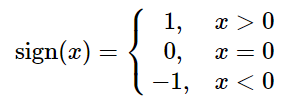

In [ ]:
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([0, 1, 1, 1])
y_and = np.array([0, 0, 0, 1])
w = np.random.rand(3,)

def sign(u):
  return 1 if (u > 0) else 0 

def perceptron(x, y, w):
    x = np.insert(x, len(x), 1, axis = 0)
    y_pred = np.matmul(x, w.T)
    y_pred = sign(y_pred)
    err = y - y_pred
    w += 0.1*err*x

def train(x, y):
  print(x,y)
  for i in range(50):
    for k, m in np.array(list(zip(x,y))):
      perceptron(k, m, w)

# train(x, y_or)

# print('OR:')
# for i in x:
# 	print(i)
# 	x = np.insert(i, len(i), 1, axis = 0)
# 	outp_pn = np.dot(x, w.T)
# 	print(sign(outp_pn))
 
train(X, y_and)

print('AND:')
for i in X:
	print(i)
	x = np.insert(i, len(i), 1, axis = 0)
	outp_pn = np.dot(x, w.T)
	print(sign(outp_pn))

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [0 0 0 1]
AND:
[0 0]
0
[0 1]
0
[1 0]
0
[1 1]
1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
train(X, y_or)

print('OR:')
for i in X:
	print(i)
	x = np.insert(i, len(i), 1, axis = 0)
	outp_pn = np.dot(x, w.T)
	print(sign(outp_pn))

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [0 1 1 1]
OR:
[0 0]
0
[0 1]
1
[1 0]
1
[1 1]
1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


# 3.	Обучение многослойной нейронной сети решению линейно неразделимых задач. Функция «Exclusive Or»

* То же самое, что и Лаб. 2, но используется многослойный персептрон
* НС: 2 слоя, 2 входа, 1 выход

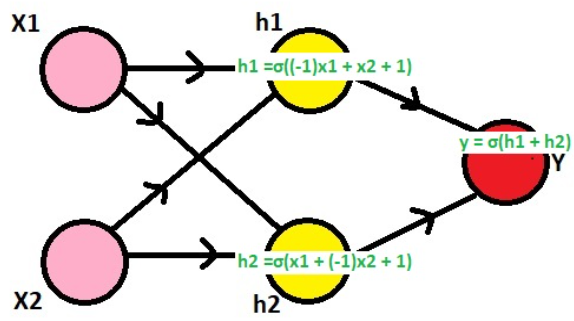

In [16]:
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0, 1, 1, 0])

w = np.random.rand(3,)

def sign(u):
  return 1 if (u > 0) else 0 

def perceptron(x, y, w):
    x = np.insert(x, len(x), 1, axis = 0)
    # print('x: ', x)
    y_pred = np.matmul(x, w.T)
    h1 = x
    np.put(x, [0], -1*x[0])
    # print('h1:', x)
    np.put(x, [1], -1*x[1])
    # print('h2:', x)
    y_pred = sign(y_pred)

    err = y - y_pred
    w += 0.1*err*x

def train(x, y):
  for i in range(50):
    for k, m in np.array(list(zip(x,y))):
      perceptron(k, m, w)
 
train(X, Y)

print('AND:')
for i in X:
	print(i)
	x = np.insert(i, len(i), 1, axis = 0)
	outp_pn = np.dot(x, w.T)
	print(sign(outp_pn))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


x:  [0 0 1]
h1: [0 0 1]
h2: [0 0 1]
x:  [0 1 1]
h1: [0 1 1]
h2: [ 0 -1  1]
x:  [1 0 1]
h1: [1 0 1]
h2: [1 0 1]
x:  [1 1 1]
h1: [1 1 1]
h2: [ 1 -1  1]
x:  [0 0 1]
h1: [0 0 1]
h2: [0 0 1]
x:  [0 1 1]
h1: [0 1 1]
h2: [ 0 -1  1]
x:  [1 0 1]
h1: [1 0 1]
h2: [1 0 1]
x:  [1 1 1]
h1: [1 1 1]
h2: [ 1 -1  1]
x:  [0 0 1]
h1: [0 0 1]
h2: [0 0 1]
x:  [0 1 1]
h1: [0 1 1]
h2: [ 0 -1  1]
x:  [1 0 1]
h1: [1 0 1]
h2: [1 0 1]
x:  [1 1 1]
h1: [1 1 1]
h2: [ 1 -1  1]
x:  [0 0 1]
h1: [0 0 1]
h2: [0 0 1]
x:  [0 1 1]
h1: [0 1 1]
h2: [ 0 -1  1]
x:  [1 0 1]
h1: [1 0 1]
h2: [1 0 1]
x:  [1 1 1]
h1: [1 1 1]
h2: [ 1 -1  1]
x:  [0 0 1]
h1: [0 0 1]
h2: [0 0 1]
x:  [0 1 1]
h1: [0 1 1]
h2: [ 0 -1  1]
x:  [1 0 1]
h1: [1 0 1]
h2: [1 0 1]
x:  [1 1 1]
h1: [1 1 1]
h2: [ 1 -1  1]
x:  [0 0 1]
h1: [0 0 1]
h2: [0 0 1]
x:  [0 1 1]
h1: [0 1 1]
h2: [ 0 -1  1]
x:  [1 0 1]
h1: [1 0 1]
h2: [1 0 1]
x:  [1 1 1]
h1: [1 1 1]
h2: [ 1 -1  1]
x:  [0 0 1]
h1: [0 0 1]
h2: [0 0 1]
x:  [0 1 1]
h1: [0 1 1]
h2: [ 0 -1  1]
x:  [1 0 1]
h1: [1 0 1]
h